# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

# Data Load

In [10]:
df = pd.read_csv('../term_deposit_subscription_classification/original_data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**მომხმარებლის შესახებ ინფორმაცია**:

*   `age`: *(Numeric)* - Age of the client.
*   `job`: *(Categorical)* - Type of job (e.g., 'admin.', 'blue-collar', 'technician', 'services', 'management', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'student', 'unemployed', 'unknown').
*   `marital`: *(Categorical)* - Marital status (e.g., 'married', 'single', 'divorced', 'unknown'). Note: 'divorced' includes divorced or widowed in some descriptions, treat as distinct status.
*   `education`: *(Categorical)* - Level of education (e.g., 'primary', 'secondary', 'tertiary', 'unknown')
*   `default`: *(Categorical)* - Has credit in default? ('no', 'yes').
*   `balance`: *(Numeric)* - Average yearly balance, in euros.
*   `housing`: *(Categorical)* - Has a housing loan? ('no', 'yes').
*   `loan`: *(Categorical)* - Has a personal loan? ('no', 'yes').

---

**მოცემული კამპანიის შესახებ ინფორმაცია**:

*   `contact`: *(Categorical)* - Contact communication type ('cellular', 'telephone', 'unknown').
*   `day`: *(Numeric)* - Last contact day of the month (1-31).
*   `month`: *(Categorical)* - Last contact month of year (e.g., 'jan', 'feb', ..., 'dec').
*   `duration`: *(Numeric)* - Last contact duration, in seconds.
    *   **Important Note:** This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call `y` is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model aiming to decide *whether to call* the client.

---

**წარსულ კამპანიებში მონაწილოების შესახებ ინფორმაცია**:

*   `campaign`: *(Numeric)* - Number of contacts performed during *this* campaign and for this client (includes last contact).
*   `pdays`: *(Numeric)* - Number of days that passed by after the client was last contacted from a *previous* campaign (-1 means client was not previously contacted).
*   `previous`: *(Numeric)* - Number of contacts performed *before* this campaign and for this client.
*   `poutcome`: *(Categorical)* - Outcome of the previous marketing campaign ('failure', 'other', 'success', 'unknown').

---

**სამიზნე ცვლადი**:

*   `y`: *(Binary)* - Has the client subscribed a term deposit? ('yes', 'no').

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


> ერთი შეხედვით, გამოტოვებული მონაცემები არ გვაქვს, მაგრამ როგორც მინიმუმ ორ ქოლუმნში(`contact`, `poutcome` ) გხვდება "unknown", რასაც უნდა მოვეპყრათ, როგორც გამოტოვებულ მონაცემს. თუმცა, ჯერ მონაცემებს გამოვიკვლევთ და ტრანსფორმაციებს შემდეგ გავაკეთებთ.

> გარდა ამისა ზარის ხანგრძლივობა(`duration`) წამებშია მოცემული და დაგვეხმარება თუ წუთებში გადავიყვანთ, უკეთესი ინტრეპრეტაციისთვის.

In [17]:
df['duration_minutes'] = df['duration'] / 60
df = df.drop(columns=['duration'])

> რიცხვითი ცვლადებიდან ასევე საყურადღებოა `pdays`-ს და 'previus', სადაც ერთის შემთხვევაში, მონაცემების ძალიან დიდი რაოდენობაა -1-ზე, ხოლო მეორეს შემთხვევაში 0-ზე.
>
> ეს ლოგიკურია, რადგან `pdays`-ში -1 ნიშნავს, რომ ამ კამპანიამდე მომხმარებელს არ დაკავშირებიან და `previous`-ში 0 ნიშნავს, რომ 0 დღეა გასული ბოლო კონტაქტიდან, რაც ბუნებრივია იქ, სადაც მომხმარებლებს აქამდე საერთოდ არ დაკავშირებიან.
>
> EDA-ის მიზნებისთვის ამ ცვლადებისთვის დროებით შევქმნით დამატებით ქოლუმნებს nan ვალუებით. თუმცა, ამას მოდელისთვის არ გამოვიყენებთ და სავარაუდოდ დამატებით ფიჩერ(ებ)ს შექვმნით

In [19]:
df['pdays_with_nan'] = df['pdays'].replace(-1, np.nan)
df['previous_with_nan'] = df['previous'].replace(0, np.nan)

> EDA-ისთვის დაგვეხმარება თუ შემდეგ ცვლადებს დავმეფავთ: `y`, `default`, 'housing', 'loan'. {'no': 0, 'yes': 1}
>
> balance	housing	loan

In [21]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})

> მონაცემებში გვაქვს დღისა და თვის ქოლუმნები, მაგრამ არ გვაქვს ინფორმაცია თუ რომელი წელია და შესაბამისად, ამ მოცემულობით ვერც იმას გავიგებთ თუ კვირის რომელი დღეა.
>
> თუმცა, ვიცით, რომ მონაცემები დროის მიხედვით დალაგებულია 2008 წლის მაისიდან, 2010 წლის ნოემბრამდე. სწორედ ამ ინფორმაციის გამოყენებით შევქმნით შესაბამის დეით ქოლუმნს და ასევე კვირის დღის ქოლუმნსაც

In [23]:
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_num'] = df['month'].map(month_map)

In [24]:
df[['month','month_num']].sample(5)

,month,month_num
16080,jul,7
38633,may,5
43141,feb,2
249,may,5
43656,may,5


In [25]:
month_diff = df['month_num'].diff()
month_diff

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    0.0
45207    0.0
45208    0.0
45209    0.0
45210    0.0
Name: month_num, Length: 45211, dtype: float64

In [26]:
rollover_indicator = (month_diff < 0)
rollover_indicator

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: month_num, Length: 45211, dtype: bool

In [27]:
year_increment = rollover_indicator.cumsum()
year_increment

0        0
1        0
2        0
3        0
4        0
        ..
45206    2
45207    2
45208    2
45209    2
45210    2
Name: month_num, Length: 45211, dtype: int32

In [28]:
df['year'] = 2008 + year_increment
df['year']

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
45206    2010
45207    2010
45208    2010
45209    2010
45210    2010
Name: year, Length: 45211, dtype: int32

In [29]:
transition_indices = df.index[rollover_indicator | rollover_indicator.shift(-1, fill_value=False)]
transition_indices

Index([27728, 27729, 42590, 42591], dtype='int64')

In [30]:
date_str_series = df['year'].astype(str) + '-' + df['month_num'].astype(str) + '-' + df['day'].astype(str)
df['date'] = pd.to_datetime(date_str_series, format='%Y-%m-%d')

In [31]:
df = df.drop(columns=['month_num', 'month', 'day', 'year'])

In [32]:
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

In [33]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,duration_minutes,pdays_with_nan,previous_with_nan,date,weekday,month
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0,4.350000,NaN,NaN,2008-05-05,Monday,May
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0,2.516667,NaN,NaN,2008-05-05,Monday,May


In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'duration_minutes', 'pdays_with_nan', 'previous_with_nan', 'date',
       'weekday', 'month'],
      dtype='object')

In [35]:
rename_mapping = {
    'marital': 'marital_status',
    'default': 'credit_default',
    'balance': 'balance_eur',
    'housing': 'housing_loan',
    'loan': 'personal_loan',
    'contact': 'communication_type',
    'campaign': 'contacts_this_campaign',
    'pdays': 'days_since_previous_contact',
    'previous': 'contacts_before_campaign',
    'poutcome': 'previous_campaign_outcome',
    'y': 'subscribed',
    'duration_minutes': 'call_duration_minutes',
    'pdays_with_nan': 'days_since_previous_contact_nan',
    'previous_with_nan': 'contacts_before_campaign_nan',
}

df = df.rename(columns=rename_mapping)

In [36]:
df.head(2)

,age,job,marital_status,education,credit_default,balance_eur,housing_loan,personal_loan,communication_type,contacts_this_campaign,days_since_previous_contact,contacts_before_campaign,previous_campaign_outcome,subscribed,call_duration_minutes,days_since_previous_contact_nan,contacts_before_campaign_nan,date,weekday,month
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0,4.350000,NaN,NaN,2008-05-05,Monday,May
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0,2.516667,NaN,NaN,2008-05-05,Monday,May


# EDA

In [38]:
target = 'subscribed'

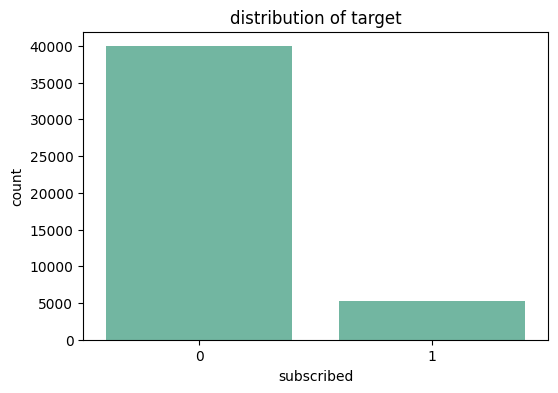

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target)
plt.title('distribution of target')
plt.show()

> ძალიან დაუბალანსებელია სამიზნე ცვლადი, რაც იმას ნიშნავს, რომ სავარაუდოდ მოგვიწევს სხვადასხვა სამფლინგ მეთოდების გამოყენება ტრენინგისას

## Numeric Features

In [42]:
df.select_dtypes(include='number').columns

Index(['age', 'credit_default', 'balance_eur', 'housing_loan', 'personal_loan',
       'contacts_this_campaign', 'days_since_previous_contact',
       'contacts_before_campaign', 'subscribed', 'call_duration_minutes',
       'days_since_previous_contact_nan', 'contacts_before_campaign_nan'],
      dtype='object')

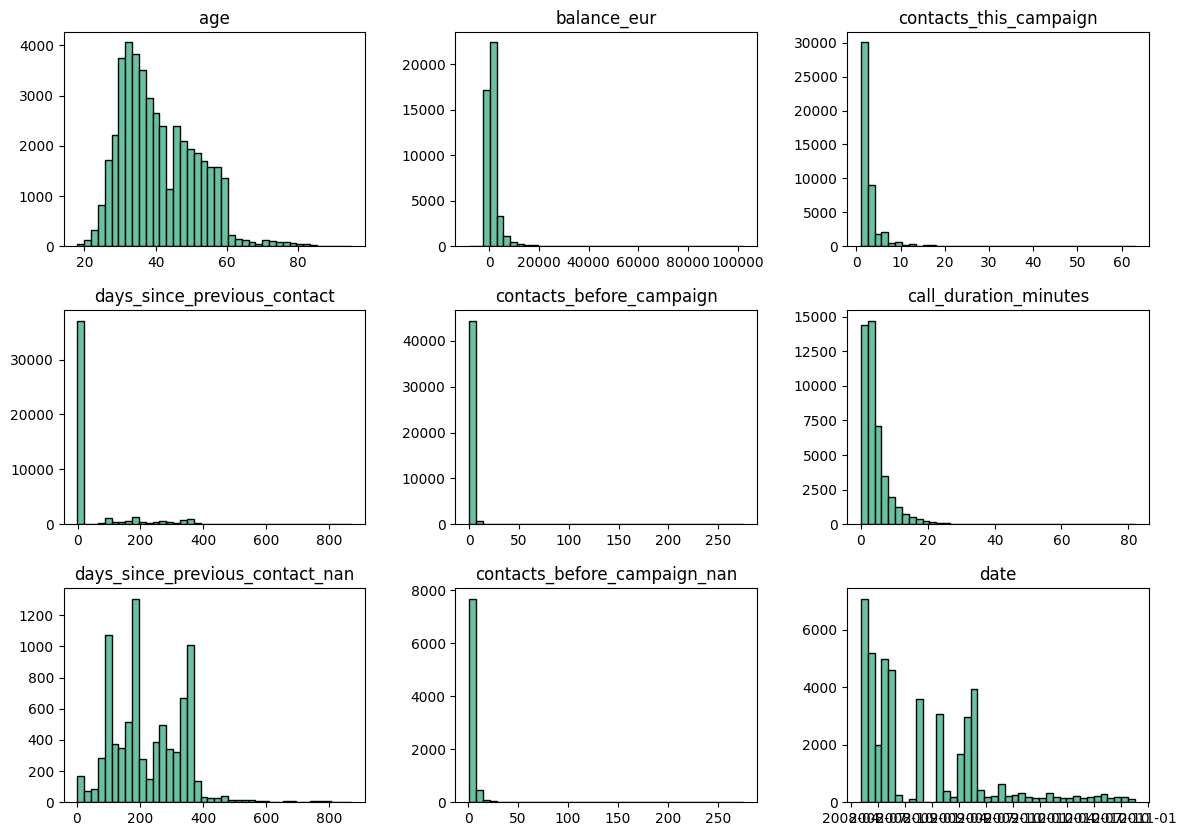

In [43]:
df.drop([target, 'credit_default', 'housing_loan', 'personal_loan'], axis=1).hist(figsize=(14, 10), bins=40, edgecolor="black", grid=False)
plt.show()

> `date`: პირველ რიგში, რაც ყურადღებას იქცევს, არის კამპანიის აქტიურობის მაჩვენებელი დროსთან მიმართებით. ადრეულ პერიოდში უფრო აქტიური იყო კამპანია (გარკვეული ჩავარდნებით) და შემდეგ თითქმის ერთ დონეზეა. გამომდინარე იქიდან, რომ დროის საკმაოდ დიდ მონაკვეთთან გვაქვს შეხება, აუცილებელია შევხედოთ, რა ხდებოდა დროის მიხედვით. ამისთვის შევხედავთ უფრო დაწვრილებით თარიღების მიხედვით აქტივობას და წარმატებული კამპანიის ალბათობას თვეების მიხედვით, წლების მანძილე

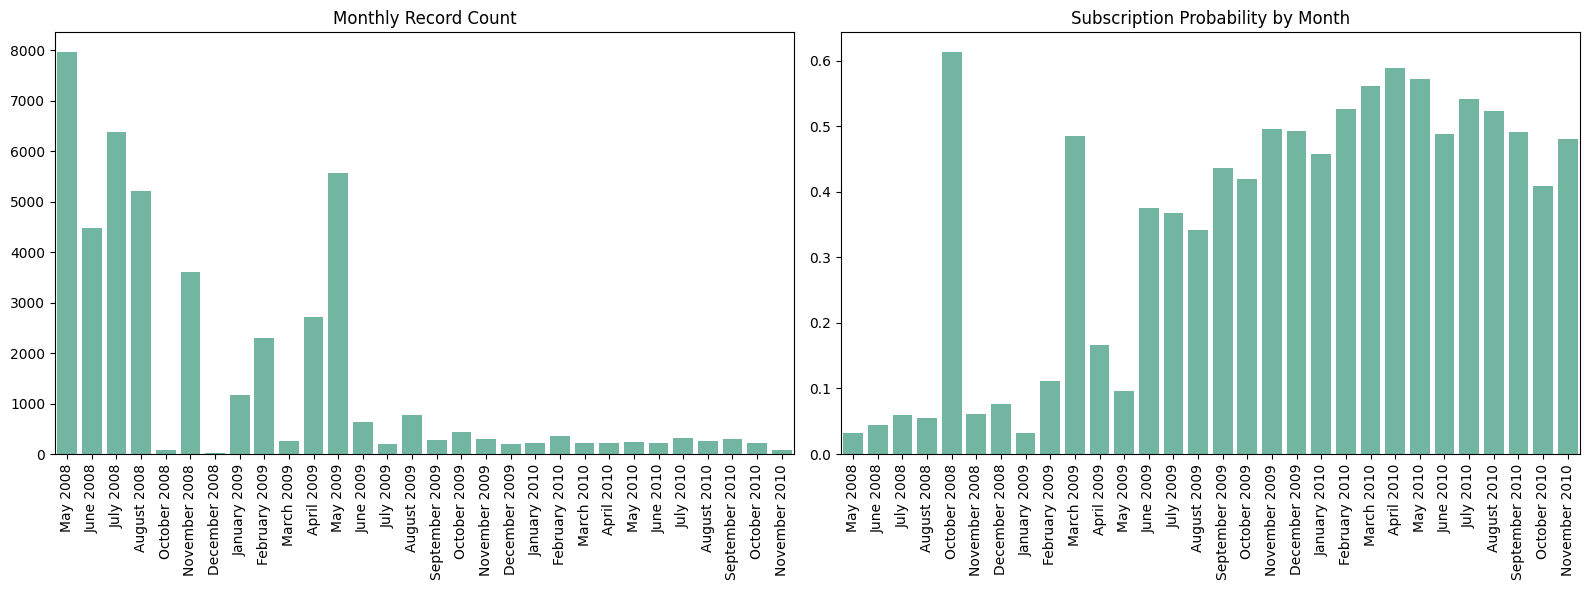

In [45]:
df_plot = df[['date', 'subscribed']].copy()

df_plot['month_year'] = df_plot['date'].dt.to_period('M').dt.to_timestamp()
df_plot['month_year_str'] = df_plot['month_year'].dt.strftime('%B %Y')

count_df = (df_plot.groupby('month_year').size().reset_index(name='count'))
count_df['month_year_str'] = count_df['month_year'].dt.strftime('%B %Y')

prob_df = (df_plot.groupby('month_year')['subscribed'].mean().reset_index(name='probability'))
prob_df['month_year_str'] = prob_df['month_year'].dt.strftime('%B %Y')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=count_df, x='month_year_str', y='count', ax=axes[0])
axes[0].set_title("Monthly Record Count")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=prob_df, x='month_year_str', y='probability', ax=axes[1])
axes[1].set_title("Subscription Probability by Month")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

> ცალსახაა, რომ 2009 წლის ივნისიდან მონაცემებში დრამატული shift გვაქვს. ეს უკავშირდება, როგორც კამპანიის აქტიურობის მაჩვენებელს, ასევე რაც მთავარია, კამპანიის წარმატების მაჩვენებელიც აბსოლუტურად განსხვავებულია. იმისთვის, რომ ხელშესახები შედეგი გვქონდეს, მოგვიწევს მონაცემების ამ თარიღიდან მოჭრა. მიუხედავად იმისა, რომ ინფორმაციის ძალიან დიდ ნაწილს დავკარგავთ. თუმცა, კარგი ამბავი ისაა, რომ შედეგად თარგეთ კლასი უფრო დაბალანსებული გახდება

In [65]:
import os
os.makedirs('preprocessed_data_files', exist_ok=True)
df.to_csv('preprocessed_data_files/data_before_cut_off.csv')

In [66]:
cutoff_date_str = '2009-06-01'
cutoff_date = pd.to_datetime(cutoff_date_str)
mask = df['date'] >= cutoff_date

df_filtered = df[mask].copy()
df_filtered.reset_index(drop=True, inplace=True)

In [67]:
df.shape, df_filtered.shape

((45211, 20), (5459, 20))

In [68]:
df_filtered.duplicated().sum()

0

> ახლა ხელახლა უნდა შევხედოთ განაწილებებს

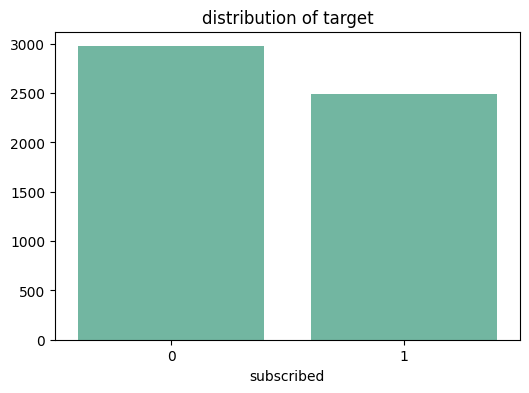

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_filtered, x=target)
plt.title('distribution of target')
plt.ylabel('')
plt.show()

> როგორც მოსალოდნელი იყო, თარგეთი მნიშვნელოვნად დაბალანსდა

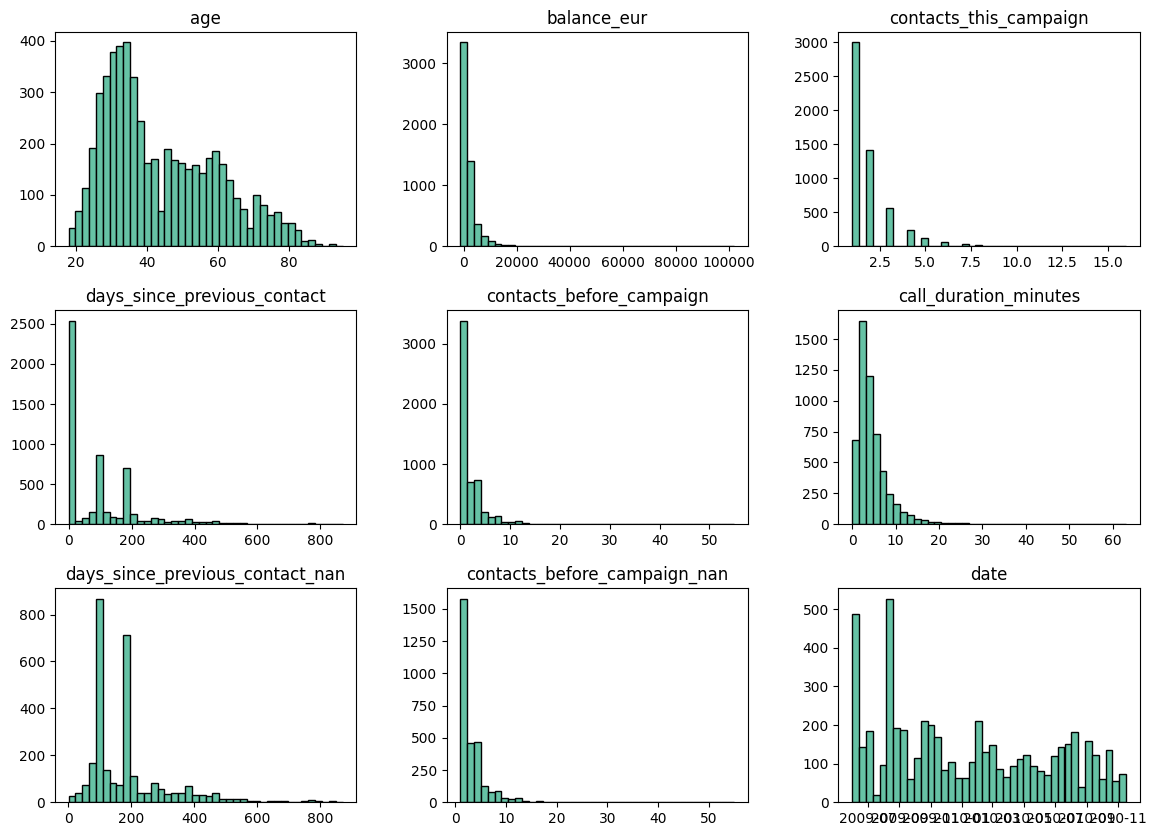

In [72]:
df_filtered.drop([target, 'credit_default', 'housing_loan', 'personal_loan'], axis=1).hist(figsize=(14, 10), bins=40, edgecolor="black", grid=False)
plt.show()

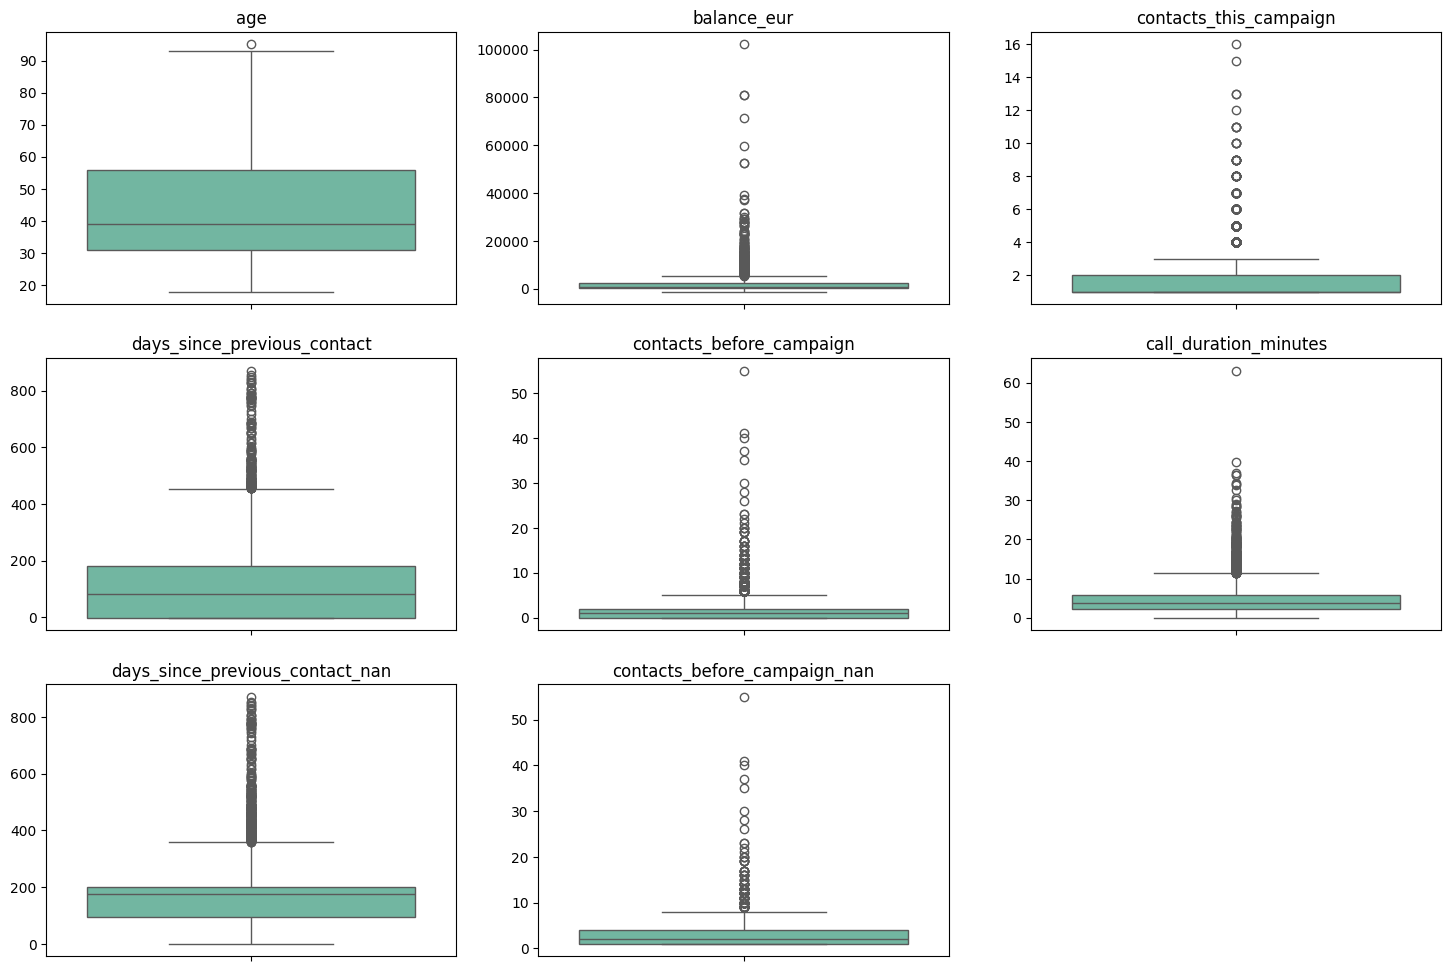

In [73]:
features = df_filtered.select_dtypes(include='number').drop(columns=[target, 'credit_default', 'housing_loan', 'personal_loan', ]).columns

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(y=df_filtered[feature], ax=axes[i])
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

#plt.tight_layout()
plt.show()

> `age`: მონაცემები მარჯვნივ არის გადახრილი. ყველაზე დიდი ჯგუფი 25-დან 60 წლამდეა, რაც ლოგიკურია, რადგან ბანკი ძირითადად მომუშავე სეგმენტს ათარგეთებს. 70 წელს ზემოთ გვვყავს აუთლაიერები, მაგრამ ამ ინფორმაციას შევინახავთ, რადგან ბუნებრივი ასაკის კატეგორიაში ხვდებიან. თუმცა, ტრენინგისას აუცილებლად გამოვიყენებთ ლოგ ტრანსფორმს და სქეილინგს
>
> `balance_eur`: მონაცემები მკვეთრად გადახრილია მარჯვნივ და გვყავს გამოკვეთილი აუთლაიერები დაგვჭირდება, როგორც ტრანსფორმაცია ისე სქეილინგი.
>
> `contacts_this_campaign`: ეს მონაცემიც მკვეთრად არის მარჯვნივ გადახრილი. მომხმარებელთა უმრავლესობას 1-ხელ ან რამდენჯერმე დაურეკეს. ეს ცვლადი ზარის ხანგრძლივობის მსგავსად არ უნდა გამოვიყენოთ პროგნოზისთვის, რადგან მომავალში მომხმარებლის ინტერესზეცაა დამოკიდებული, წინასწარ არ ვიცით, რამდენი ზარის განხორციელებას შევძლებთ და არასწორი მიმართულება შეიძლება მოგვცეს.
>
> `days_since_previous_contact` - გამოყენება რთული იქნება. რადგან ბევრი -1(მომხმარებელს არ დაკავშირებიან) მონაცემი გვაქვს. სავარაუდოდ დაგვჭირდება დამატებითი ფიჩერის შექმნა. `days_since_previous_contact_nan` რამდენიმე პიკს აჩვენებს და აქაც მარჯვნივ არის გადახრილი მონაცემი. თუმცა, სავარაუდოდ, არც ერთ ფიჩერს არ გამოვიყენებთ პირდაპირ.
>
> `contacts_before_this_campaign` - იგივე სიტუაციაა 0-ზე, რაც days_since_previous_contact-ის -1-ზე, რადგან ნიშნავს თუ რამდენი დღე გავიდა ბოლო კონტაქტიდან. შესაბამისად 0-ია იქ, სადაც მომხმარებლებს აქამდე საერთოდ არ დაკავშირებიან. `contacts_before_this_nan`, მკვეთრად მარჯვივ გადახრილ მონაცემს აჩვენებს. მომხმარებელთა აბსოლუტურ უმრავლესობას რამდენჯერმე დაუკავშირდნენ წინა კამპანიის დროს. ძალიან ცოტა მონაცემია დაახლოებით 15-ის მარჯვივ.
>
> `call_duration_minutes`: გადახრილია მარჯვნივ. ვხვდებით მკეთრ აუთლაიერებსაც, რომელთაც დიდი ხნის განმავლობაში ესაუბრნენ. მონაცემთა დიდი ნაწილი 10 წუთამდეა მოქცეული. ამ ფიჩერს პრედიქტირებისთვის გამოყენება არც ისე მიზანშეწონილია, რადგან დარეკვის ხანგრძლივობას მხოლოდ ზარის შესრულების შემდეგ ვიგებთ და შესაძლოა არარეალისტური მოლოდინები გაგვიჩინოს. თუმცა, რადგან ეს დემო ვერსიაა, მაინც გამოვიყენებთ. 

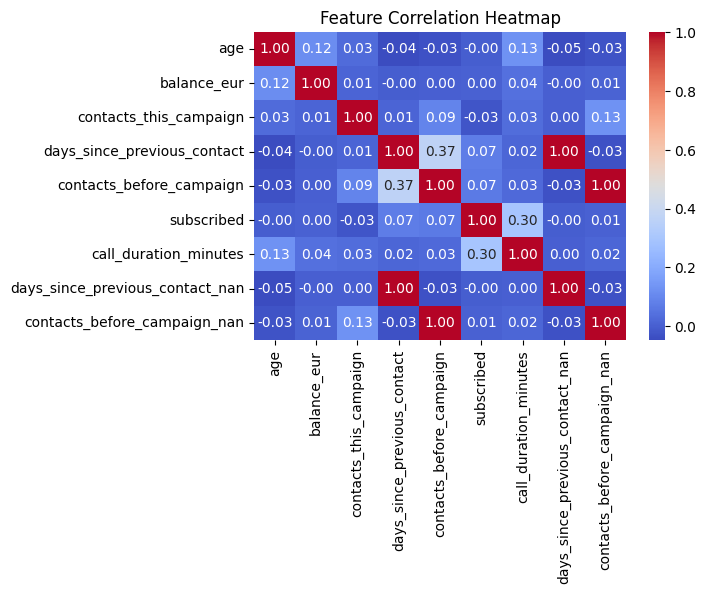

In [75]:
corr_matrix = df_filtered.select_dtypes(include="number").drop(columns=['credit_default', 'housing_loan', 'personal_loan']).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation = 90)
plt.show()

> როგორც ვხედავთ თარგეთ ველუს რაიმე საყურადღებო კორელაცია მხოლოდ ზარის ხანგრძლივობასთან აქვს, რაც არ არის კარგი ამბავი, რადგან,როგორც აღვნიშნეთ, ეს ცვლადი პოტენციურად შეცდომაში შემყვანია.
>
> მას შემდეგ, რაც დაკავშირებიდან გასულ დღეებში ნანები ჩავამატეთ, მცირე კორელაციური(უარყოფითი) გამოჩნდა თარგეთ ველიუსთან. რაც იზრდება ბოლოს დაკავშირებიდან დღეების რაოდენობა მით უფრო მცირდება ვადიანი ანაბრის გახსნის შანსი, რაც ნაკლებ ინტერესსაც შეიძლება მიუთითებდეს და ლოგიკურია.
>
> ზოგიერთ ცვლადში სუსტ კორელაციას შესაძლოა მკვეთრი აუთლაიერების არსებობაც იწვევს, მაგალითად ბალანსის შემთხვევაში.

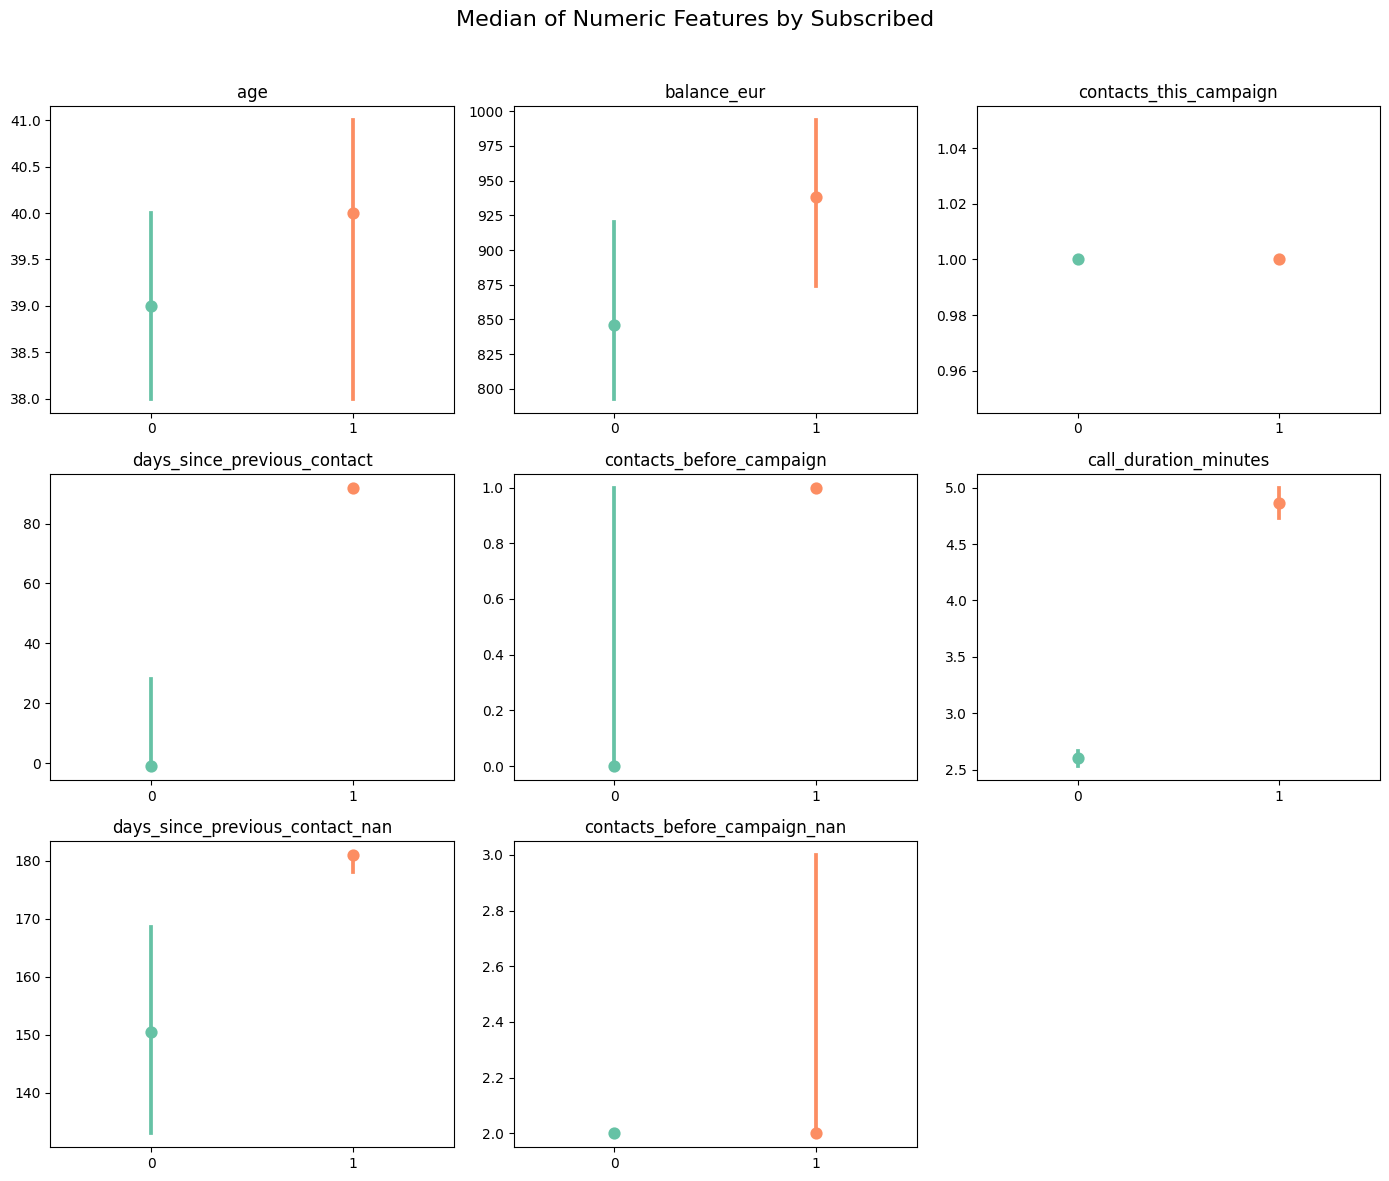

In [77]:
features = df_filtered.select_dtypes(include='number').drop(columns=['subscribed', 'credit_default', 'housing_loan', 'personal_loan']).columns

fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.pointplot(data=df_filtered, x=target, y=feature, hue=target, estimator=np.median, legend=False, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f"Median of Numeric Features by {target.capitalize()}", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

> როგორც ვხედავთ თარგეთის მიხედვით საყურადღებო სხვაობა მედიანურ მნიშვნელობებში მხოლოდ ბალანსზე, საუბრის ხანგრძლივობაზე და გასული დღეების რაოდენობაზე გვაქვს. (საშუალო ამ გრაფიკზე არ გამოდგებოდა აუთლაიერების გამო)
>
> საუბრის ხანგრძლივობას როგორც ფრედიქთორს ვერ გამოვიყენებთ, ამიტომ დანარჩენ ორ ცვლადზე ყურადღებით მოგვიწევს გამკლავება

In [79]:
df_filtered['days_since_previous_contact'].value_counts().head(3)

days_since_previous_contact
-1      2517
 92      139
 182     124
Name: count, dtype: int64

In [80]:
df_filtered['contacts_before_campaign'].value_counts().head(3)

contacts_before_campaign
0    2517
1     869
2     710
Name: count, dtype: int64

> შექვმნით ახალ ქოლუმნს, სადაც შევინახავთ ინფორმაციას დაკონტაქტებია თუ არა, მომხმარებელს ბანკი ამ კამპანიამდე. ძველ ქოლუმნებს ჯერჯერობით დავიტოვებთ.

In [82]:
df_filtered['was_contacted_before'] = np.where(df_filtered['days_since_previous_contact'] == -1, 0, 1)
df_filtered['was_contacted_before'].value_counts()

was_contacted_before
1    2942
0    2517
Name: count, dtype: int64

## Categorical Features

In [84]:
def plot_distribution_and_target_prob(df, feature, target, rotation=0):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Count plot (distribution)
    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f"Distribution of {feature}")
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")
    axes[0].tick_params(axis='x', rotation=rotation)

    # Bar plot (probability of subscribed by feature)
    sns.barplot(data=df, y=target, x=feature, hue=feature, palette="Set2", legend=False, ax=axes[1])
    axes[1].set_title(f"Probability of {target} by {feature}")
    axes[1].set_xlabel("")
    axes[1].set_ylabel("")
    axes[1].tick_params(axis='x', rotation=rotation)

    plt.tight_layout()
    plt.show()

In [85]:
df_filtered.select_dtypes(include='object').columns

Index(['job', 'marital_status', 'education', 'communication_type',
       'previous_campaign_outcome', 'weekday', 'month'],
      dtype='object')

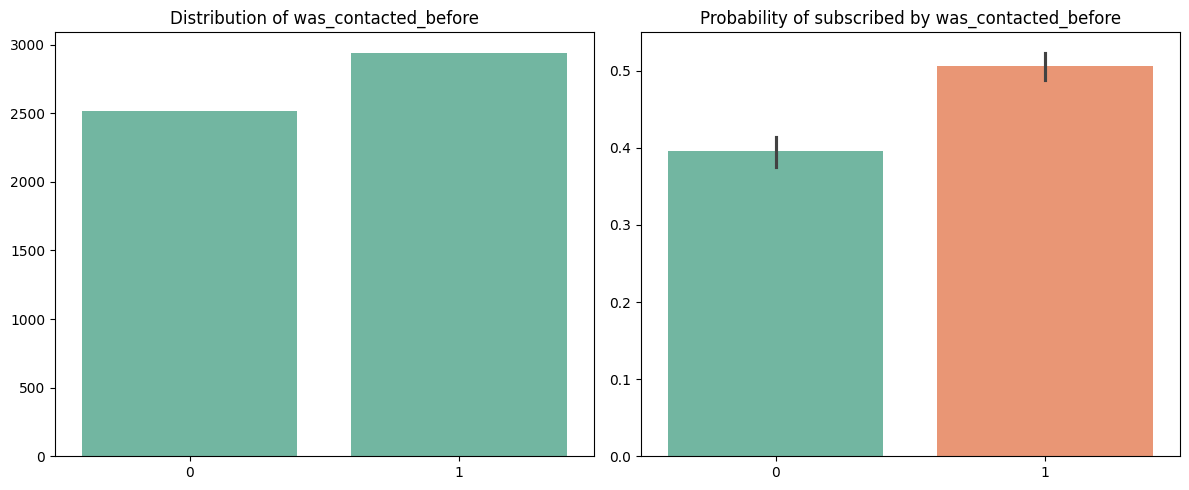

In [86]:
plot_distribution_and_target_prob(df_filtered, 'was_contacted_before', target)

> ახალი ქოლუმნის შექმნის შედეგად, გარკვეული სხვაობა არის ალბათობებში, შესაძლოა მოდელს ეს ინფორმაცია გამოადგეს

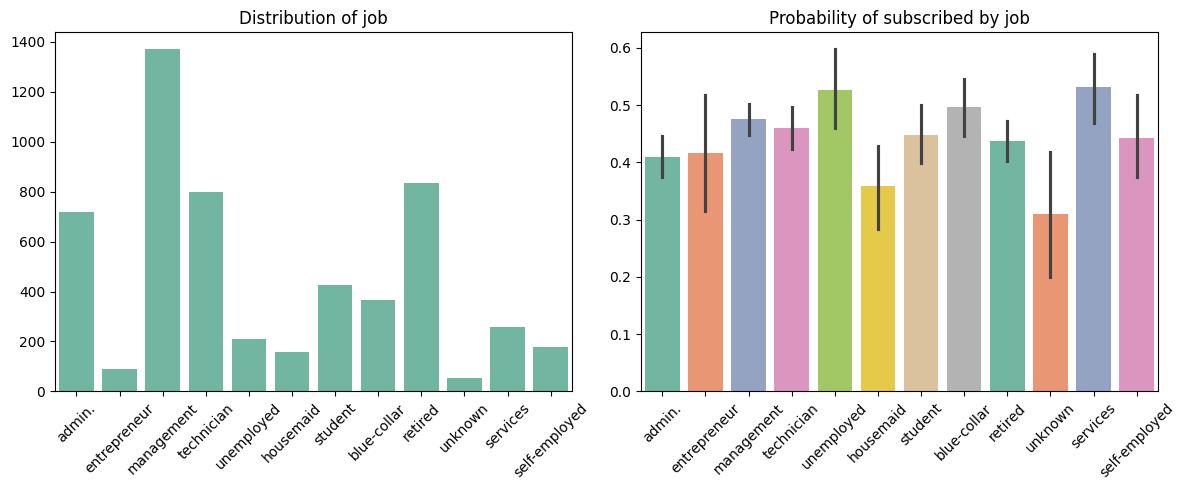

In [88]:
plot_distribution_and_target_prob(df_filtered, 'job', target, rotation=45)

> ამ კატეგორიებს დაჯგუფება სჭირდება. შინაარსობრივად.

In [90]:
df_filtered['job'].unique()

array(['admin.', 'entrepreneur', 'management', 'technician', 'unemployed',
       'housemaid', 'student', 'blue-collar', 'retired', 'unknown',
       'services', 'self-employed'], dtype=object)

In [91]:
job_mapping = {
    # Group 1: Admin/Mgmt/Tech
    'admin.': 'Admin/Mgmt/Tech',
    'management': 'Admin/Mgmt/Tech',
    'technician': 'Admin/Mgmt/Tech',

    # Group 2: Blue-collar/Service
    'blue-collar': 'Blue-collar/Service',
    'services': 'Blue-collar/Service',
    'housemaid': 'Blue-collar/Service', # Grouping housemaid here

    # Group 3: Student/Retired/Unemployed
    'student': 'Student/Retired/Unemployed',
    'retired': 'Student/Retired/Unemployed',
    'unemployed': 'Student/Retired/Unemployed',

    # Group 4: Entrepreneur/Self-employed
    'entrepreneur': 'Entrepreneur/Self-employed',
    'self-employed': 'Entrepreneur/Self-employed',

    # Group 5: Unknown
    'unknown': 'Unknown'
}

df_filtered['job_group'] = df_filtered['job'].map(job_mapping)

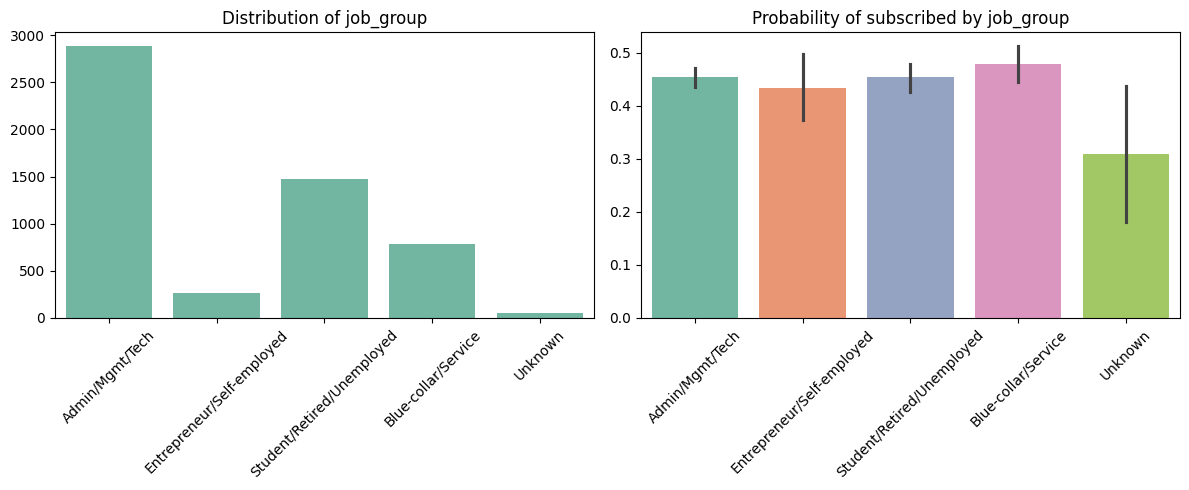

In [92]:
plot_distribution_and_target_prob(df_filtered, 'job_group', target, rotation=45)

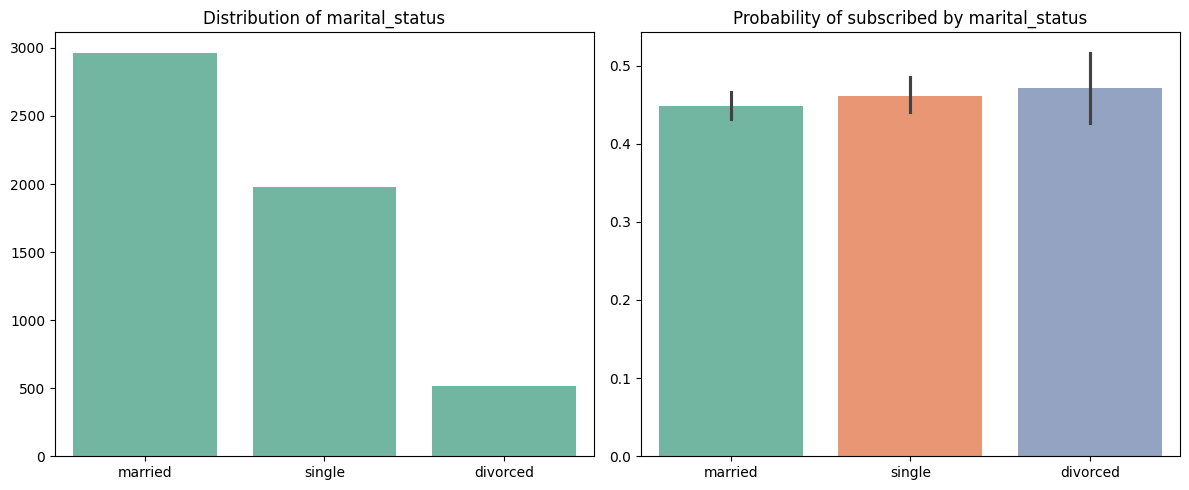

In [93]:
plot_distribution_and_target_prob(df_filtered, 'marital_status', target)

> Single და Divorced-ის გაერთიანება შესაძლებელია. თუმცა, გამომდინარე იქიდან, რომ ძალიან ბევრი ფიჩერი არ გვაქვს და მოდელისთვის რაც შეიძლება დიდი ინფორმაციის შენახვა გვჭირდება. შესაძლოა ასეც დავტოვოთ

In [95]:
marrital_mapping = {
    'married': 'Married',
    'single': 'Single',
    'divorced': 'Single',
}

df_filtered['marital_status'] = df_filtered['marital_status'].map(marrital_mapping)

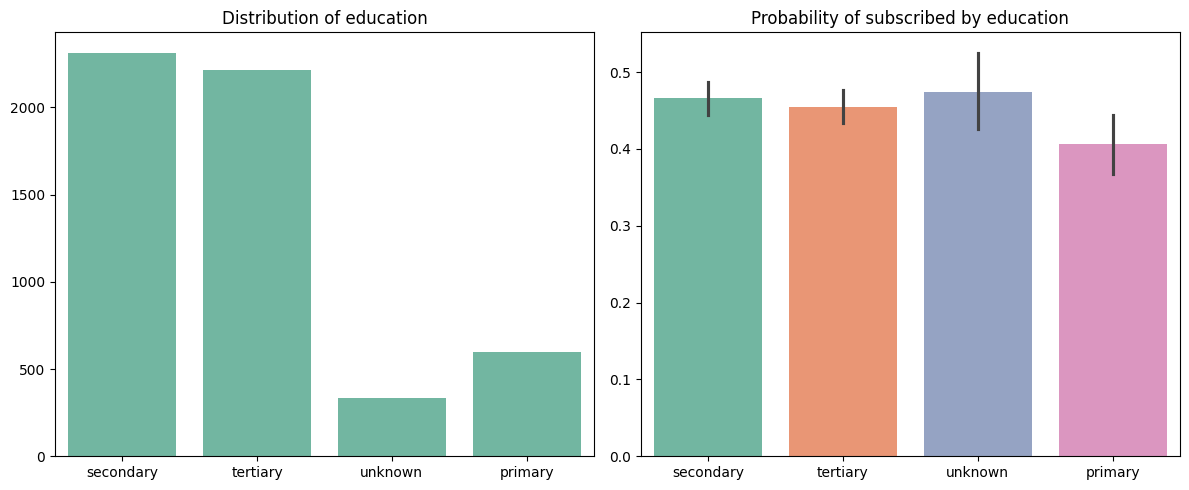

In [96]:
plot_distribution_and_target_prob(df_filtered, 'education', target)

> უმაღლესი განათლების მქონე მომხმარებლები ყველაზე მეტად თანმხდებიან ბანკს, შემდეგ მედის საშუალო განათლების და შემდეგ პრაიმარი. unknown-ს შევინარჩუნებთ ცალკე კატეგორიად.

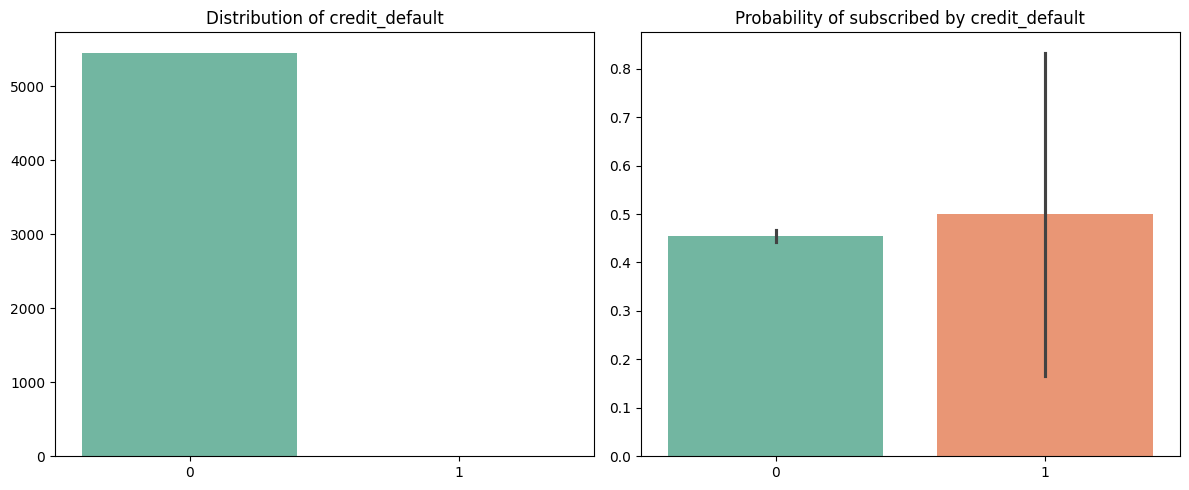

In [98]:
plot_distribution_and_target_prob(df_filtered, 'credit_default', target)

> ეს ცვლადი არ გამოგვადგება, რადგან თითქმის არავის აქვს სესხი დეფოლტში

In [100]:
df_filtered['credit_default'].value_counts()

credit_default
0    5453
1       6
Name: count, dtype: int64

In [101]:
df_filtered.drop('credit_default', axis=1, inplace=True)

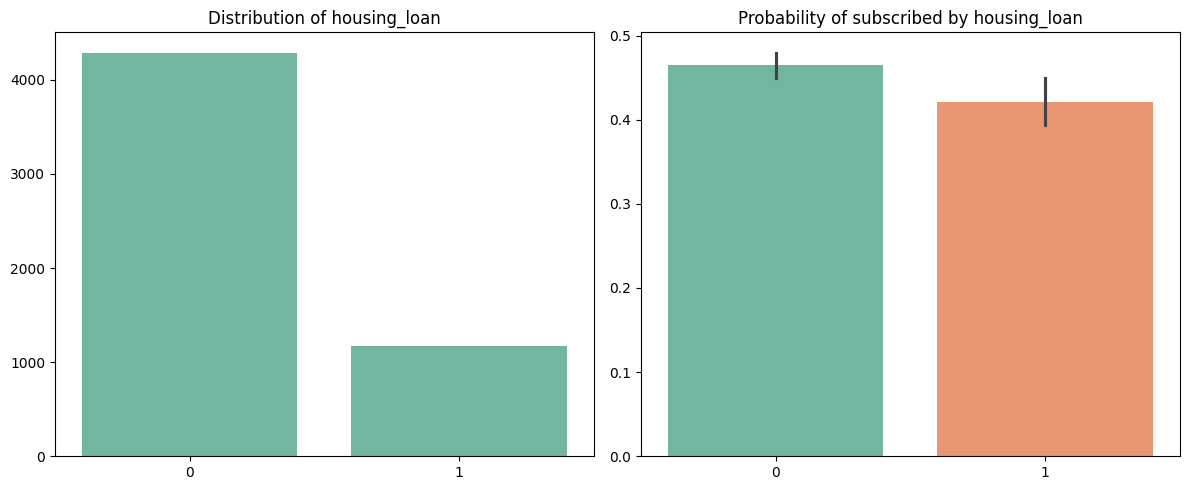

In [102]:
plot_distribution_and_target_prob(df_filtered, 'housing_loan', target)

> ვისაც იპოთეკური სესხი აქვს, ისინი ნაკლებად ხსნიან ანაბარს.

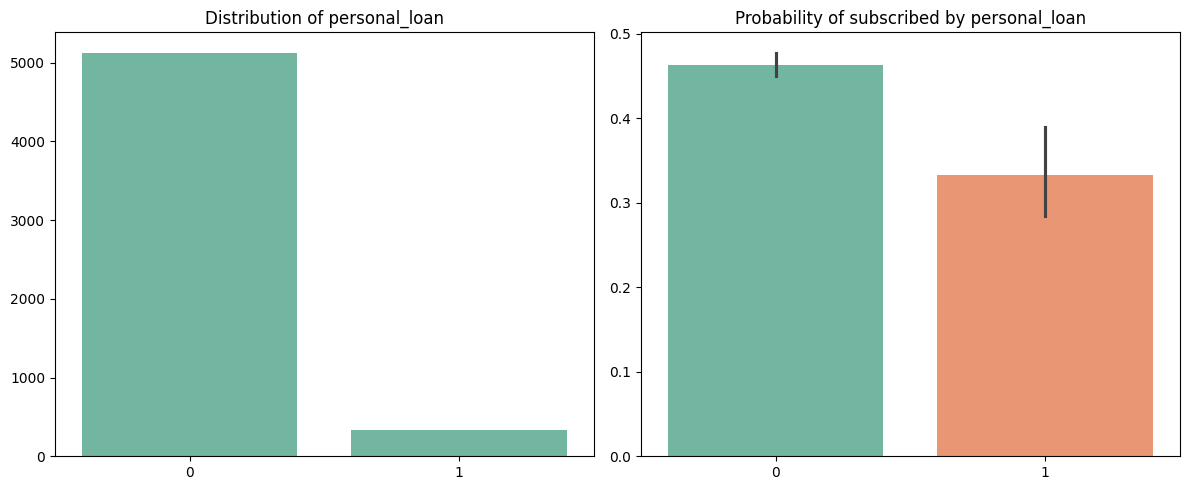

In [104]:
plot_distribution_and_target_prob(df_filtered, 'personal_loan', target)

> ვისაც სამომხმარებლოს სესხი აქვს, ისინიც ასევე ნაკლებად ხსნიან ანაბარს. შესაძლებელია ამ ორი ფიჩერის გაერთიანება, აქვს თუ არა მომხმარებელს იპოთეკური ან სამომხმარებლო სესხი და ასევე აქვთ თუ არა, ორივე

In [106]:
df_filtered['has_loan'] = ((df_filtered['housing_loan'] == 1) | (df_filtered['personal_loan'] == 1)).astype(int)

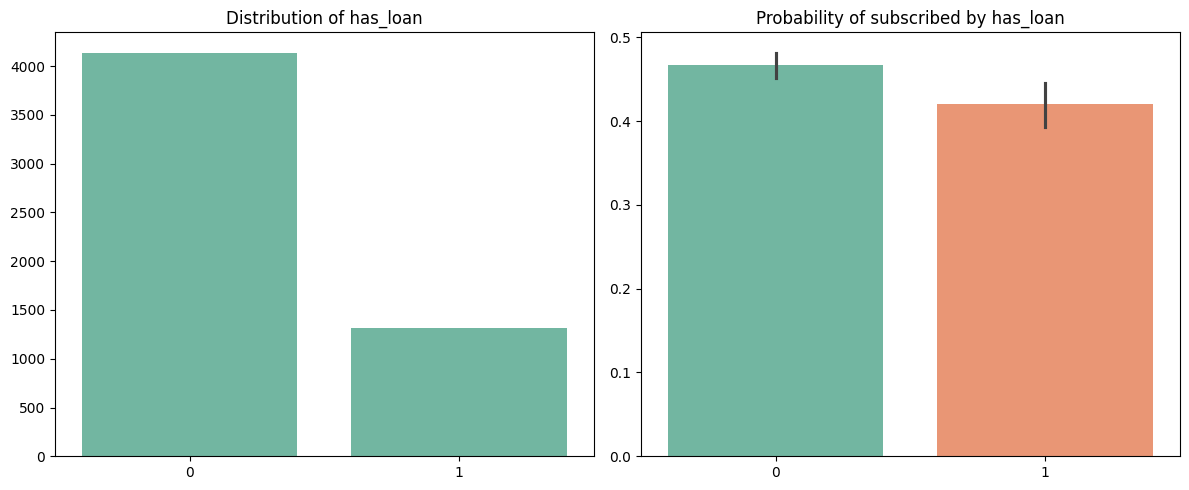

In [107]:
plot_distribution_and_target_prob(df_filtered, 'has_loan', target)

> ასევე შეგვიძლია შევქმნათ ცვლადი, აქვს თუ არა ორივე სესხი მომხმარებელს.

In [109]:
df_filtered['has_both_loan'] = ((df_filtered['housing_loan'] == 1) & (df_filtered['personal_loan'] == 1)).astype(int)

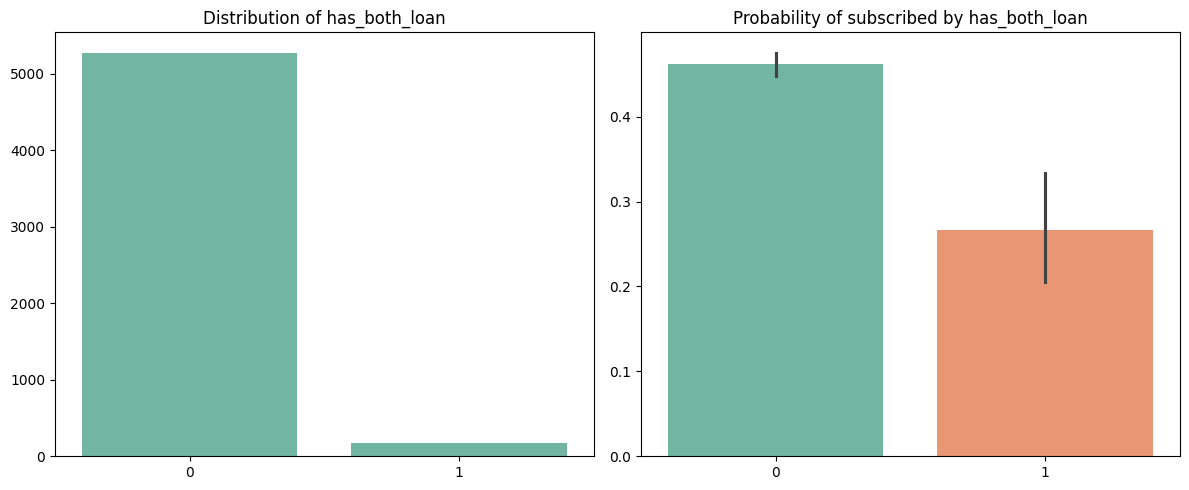

In [110]:
plot_distribution_and_target_prob(df_filtered, 'has_both_loan', target)

> მიუხედავად იმისა, რომ ასეთი მომხმარებლები ცოტანი არიან, ალბათობებში სხვაობა აშკარაა და ცოტა მეტ ინფორმაციას მისცემს მოდელს

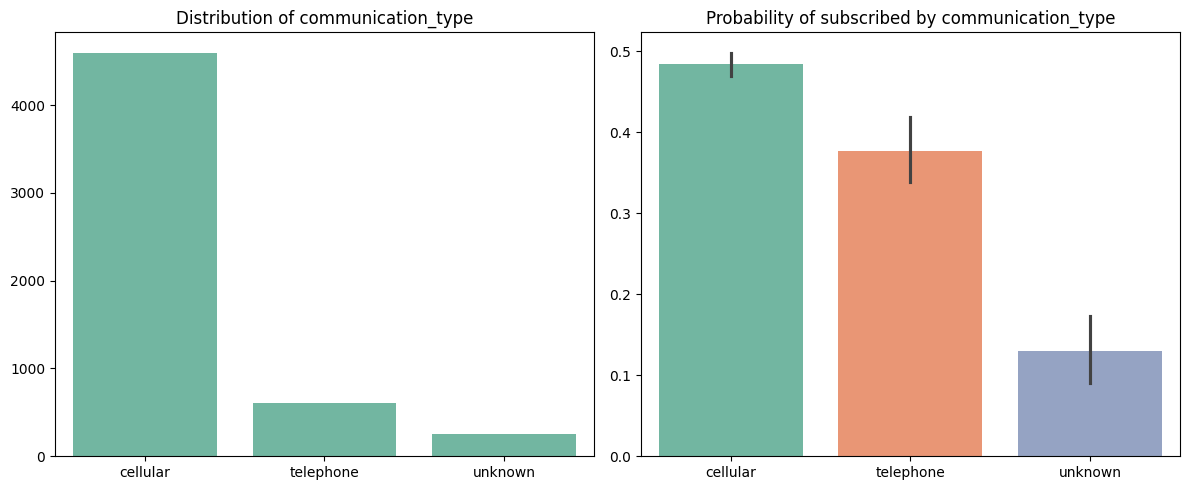

In [112]:
plot_distribution_and_target_prob(df_filtered, 'communication_type', target)

> ვისაც მობილურით უკავშირდებიან ისინი ოდნავ მეტად თანხმებიან ანაბარს. unknown - შევინარჩუნებთ ცალკე კატეგორიად.

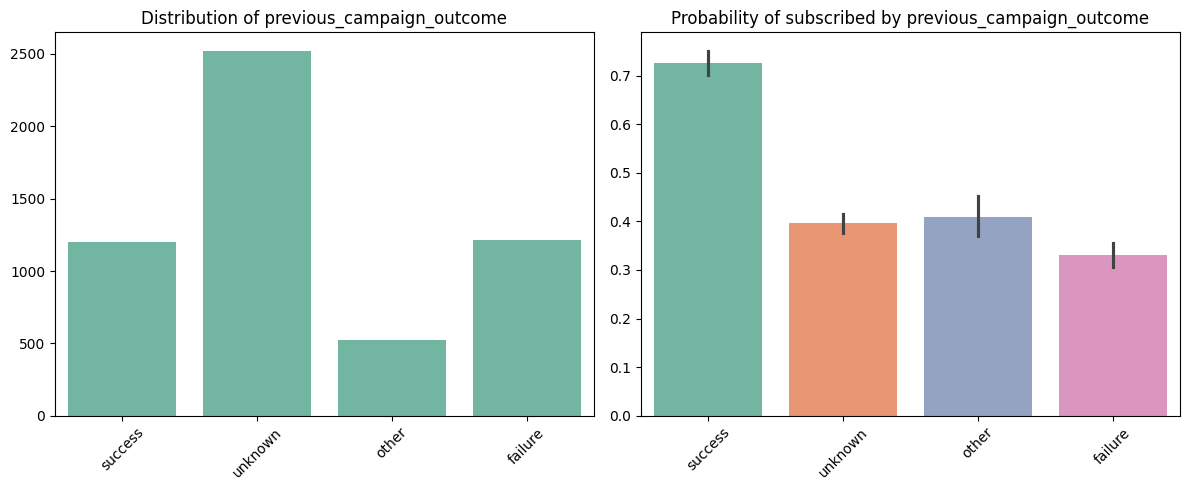

In [114]:
plot_distribution_and_target_prob(df_filtered, 'previous_campaign_outcome', target, rotation=45)

> ბუნებრივია, რომ წინა კამპანიის ფარგლებში წარმატება, ახალ კამპანიის წარმატებასაც აჩვენებს. uknown ის მომხმარებლები უნდა იყვნენ, ვისთანაც აქამდე შეხება არ ჰქონიათ. მას უნდა მოვეპყრათ როგორც ნან ველიუს

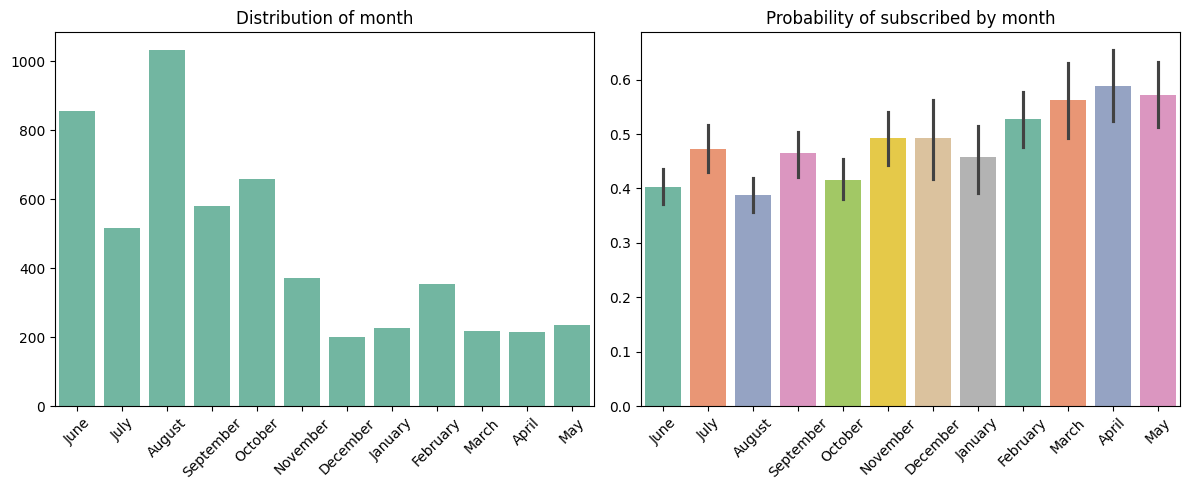

In [116]:
plot_distribution_and_target_prob(df_filtered, 'month', target, rotation=45)

> საყურადღებო ცვლადია, რადგან გარკვეულ ციკლურობას შესაძლოა აჩვენებდეს. გაზაფხულზე ოდნავ უფრო წარმატებულია კამპანია, მკვეთრი სხვაობა ალბათობებში თვეების მიხედვით არაა

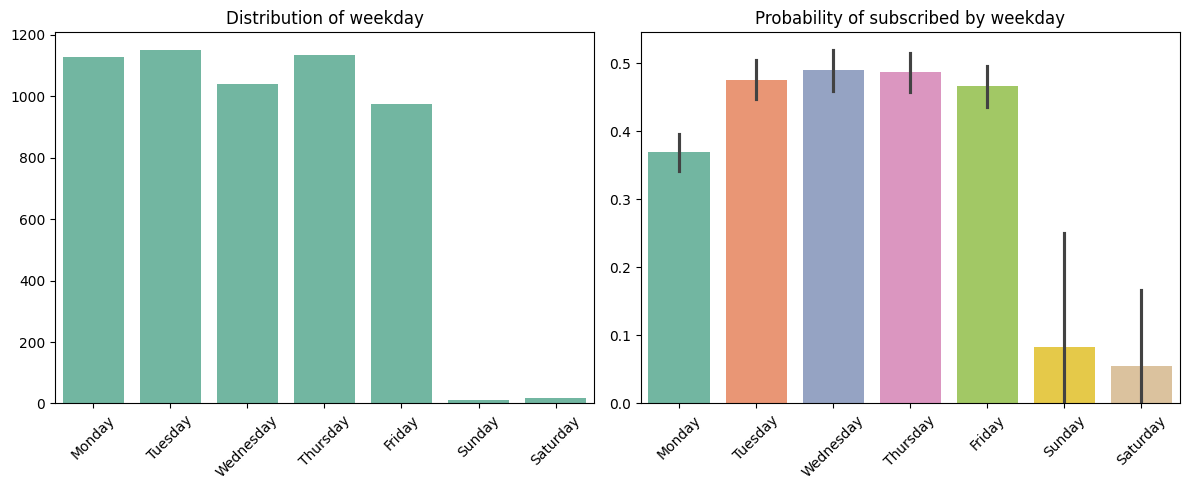

In [118]:
plot_distribution_and_target_prob(df_filtered, 'weekday', target, rotation=45)

ბუნებრივია, რომ ბანკი ვიქენდზე ნაკლებად უკავშირდება ხალხს. ამ ცვლადს დავმეფავთ და შევამცირებთ კარდინალურობას. გამომდინარე იქიდან, რომ მონაცემებში გამოკვეთილი ფრედიქთორები არ გვაქვს სამუშაო დღეებს შევინარჩუნებთ, როგორც არის (ორშაბათს როგორც ჩანს ტველაზე დაბალია ალბათობა კამპანიის წარმატების და ეს ინფორმაცია შევუნახოთ მოდელს)

შაბათს და კვირას ჩავანაცვლებთ ვიქენდით.

In [120]:
df_filtered['weekday'] = df_filtered['weekday'].replace({'Saturday': 'Weekend', 'Sunday': 'Weekend'})

In [121]:
df_filtered.head(2)

,age,job,marital_status,education,balance_eur,housing_loan,personal_loan,communication_type,contacts_this_campaign,days_since_previous_contact,...,call_duration_minutes,days_since_previous_contact_nan,contacts_before_campaign_nan,date,weekday,month,was_contacted_before,job_group,has_loan,has_both_loan
0,55,admin.,Married,secondary,602,0,0,cellular,3,90,...,5.400000,90.0,2.0,2009-06-01,Monday,June,1,Admin/Mgmt/Tech,0,0
1,57,entrepreneur,Married,secondary,2464,0,0,cellular,1,-1,...,1.883333,NaN,NaN,2009-06-01,Monday,June,0,Entrepreneur/Self-employed,0,0


# Saving Cleaned File

In [122]:
cleaned_df = df_filtered.copy()

In [123]:
cleaned_df.to_csv('preprocessed_data_files/data_after_cut_off_cleaned.csv', index=False)